<a href="https://colab.research.google.com/github/Valerylu97/Machine_Learning/blob/main/Machine_Learning_Laboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

#Load data
En el repositorio de github eh subido el archivo csv con los datos.

Podemos usar el archivo presente en el repositorio usando las siguientes líneas de código.


```
# !git clone https://github.com/Valerylu97/Machine_Learning.git

df = pd.read_csv('Machine_Learning/data.csv')
```



La siguiente línea de código nos permite leer los datos desde el repositorio del profesor Erick

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/erickedu85/dataset/master/age_income.csv')

# Data Information

**Información sobre la estructura y tipo de datos del set**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               150 non-null    int64
 1   annual_income($)  150 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB


**Visualizar los 5 primeros datos**

In [4]:
df[:5]

,age,annual_income($)
0,17,17123
1,17,18375
2,16,18557
3,23,17721
4,22,17291


#Visualización de los datos

Text(0, 0.5, 'Annual Income ($)')

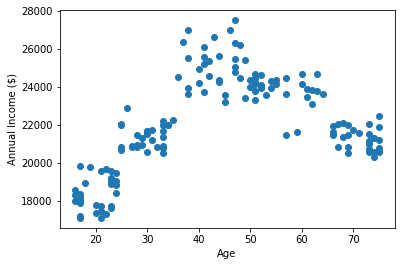

In [5]:
plt.scatter(df['age'], df['annual_income($)'])
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')

#Question 1:
**Why using a scatterplot to visualize this data set?**

**Answer:**

In this case we use a scatter plot because it allows us to create scatter plots in which the properties of each individual point can be individually controlled or assigned to the data. Allowing us to visualize the data in a better way and we could even visualize overlapping data.

Text(0, 0.5, 'Annual Income ($)')

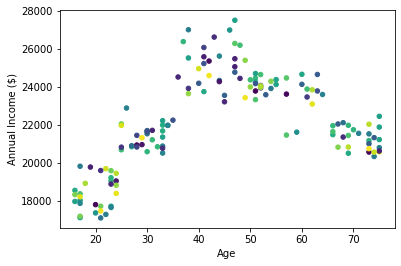

In [6]:
import numpy as np

rng = np.random.RandomState(0)
colors = rng.rand(150)

plt.scatter(df['age'], df['annual_income($)'], c=colors, s=20)
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')

# Obtain the k value

In [7]:
sse = []
k_range = range(1,11)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['age', 'annual_income($)']])
  sse.append(km.inertia_)

# Visualize the Elbow plot

Text(0, 0.5, 'Sum of square error')

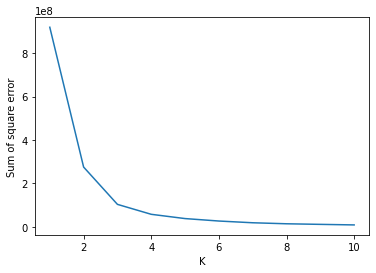

In [8]:
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Sum of square error')

#Question 2:
**What is the value of 'K', Why did you choose it?**

**Answer:**

The k optimum value is $K=3$, because the value of sse drastically change forming a elbow like we can see in the figure above.

To verify the value I have used the following code

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


AttributeError: ignored

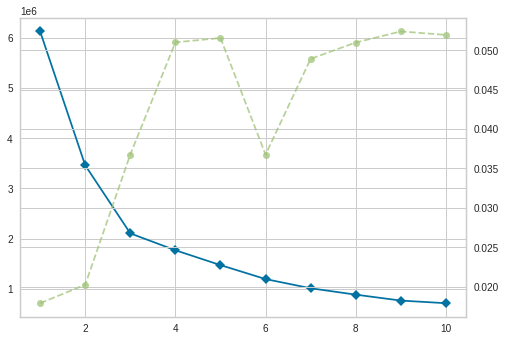

In [9]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Clustering

In [10]:
k = 3
clustering = KMeans(n_clusters=k)
clusters = clustering.fit_predict(df[['age', 'annual_income($)']])
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#Adding the clusters to the data set

In [11]:
df['cluster'] = clusters
df.head

<bound method NDFrame.head of      age  annual_income($)  cluster
0     17             17123        2
1     17             18375        2
2     16             18557        2
3     23             17721        2
4     22             17291        2
..   ...               ...      ...
145   66             21653        0
146   75             20631        0
147   74             20572        0
148   69             21452        0
149   73             20754        0

[150 rows x 3 columns]>

#Drawing the clusters

No handles with labels found to put in legend.


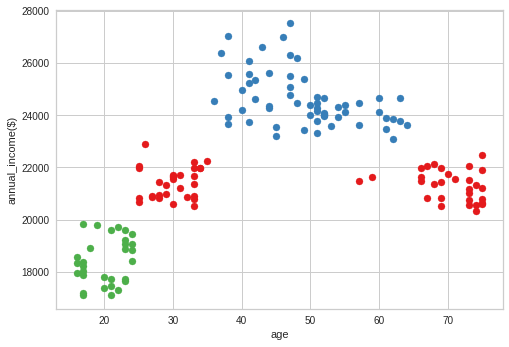

In [12]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['age'], df0['annual_income($)'], color='#e41a1c')
plt.scatter(df1['age'], df1['annual_income($)'], color='#377eb8')
plt.scatter(df2['age'], df2['annual_income($)'], color='#4daf4a')
plt.xlabel('age')
plt.ylabel('annual_income($)')
plt.legend()

#Question 3:
**What do you think about the clusters, they make sense?**

**Answer:**

No. They don't make sense, because we can observe there are 3 clusters one of this has 2 different age groups.

#Normalize the data set

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['annual_income($)']])
df['norm_annual_incomes($)'] = scaler.transform(df[['annual_income($)']])

scaler.fit(df[['age']])
df['norm_age'] = scaler.transform(df[['age']])

#Question 4
**What does the MinMaxScaler function?**

**Answer:**

MinMaxScaler function transform the values on the data set into values between 0 to 1. As we can see in the coding line below, the maximum value in the normalization is 1 and the minimum is 0.

In [14]:
df.describe()

,age,annual_income($),cluster,norm_annual_incomes($),norm_age
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,43.793333,22067.033333,0.800000,0.476381,0.471073
std,18.281283,2484.280387,0.750838,0.238552,0.309852
min,16.000000,17106.000000,0.000000,0.000000,0.000000
25%,28.000000,20647.250000,0.000000,0.340047,0.203390
50%,43.500000,21821.000000,1.000000,0.452756,0.466102
75%,58.500000,24079.750000,1.000000,0.669651,0.720339
max,75.000000,27520.000000,2.000000,1.000000,1.000000


#Obtain the k value from the normalized values

In [15]:
norm_sse = []
k_range = range(1,11)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['norm_age', 'norm_annual_incomes($)']])
  norm_sse.append(km.inertia_)

#Visualize the Elbow plot form the normalized values

Text(0, 0.5, 'Sum of squared error')

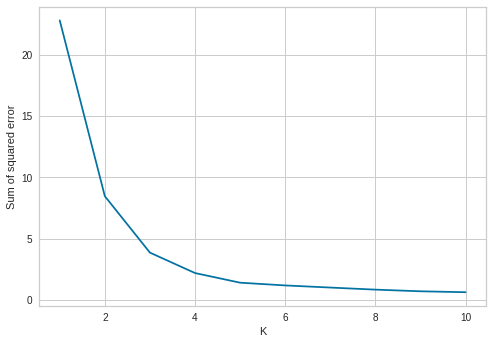

In [16]:
plt.plot(k_range, norm_sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

**Other method to visualize Elbow plot**

AttributeError: ignored

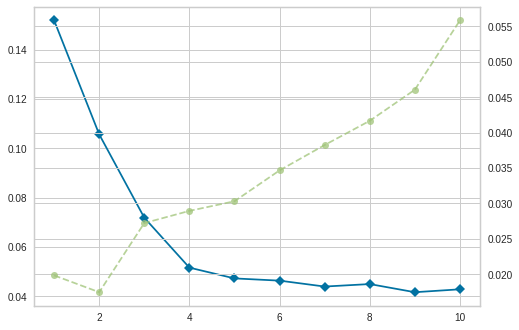

In [17]:
df_norm = df[['norm_age', 'norm_annual_incomes($)']]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df_norm)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#Clustering normalized values

In [27]:
k=4
clustering = KMeans(n_clusters=k)
norm_cluster = clustering.fit_predict(df[['norm_annual_incomes($)', 'norm_age']])
norm_cluster

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#Adding the clustering to the data set

In [28]:
df['norm_cluster'] = norm_cluster
df.head()

,age,annual_income($),cluster,norm_annual_incomes($),norm_age,norm_cluster
0,17,17123,2,0.001632,0.016949,3
1,17,18375,2,0.121855,0.016949,3
2,16,18557,2,0.139332,0.000000,3
3,23,17721,2,0.059055,0.118644,3
4,22,17291,2,0.017765,0.101695,3


#Visualize the clusters

No handles with labels found to put in legend.


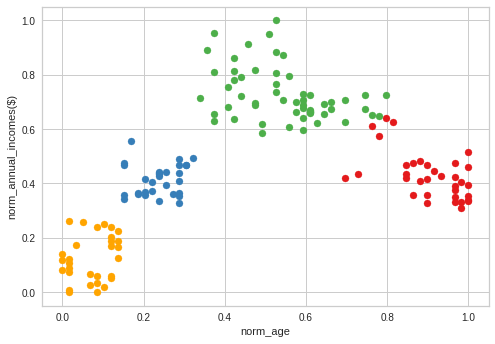

In [30]:
df0=df[df.norm_cluster==0]
df1=df[df.norm_cluster==1]
df2=df[df.norm_cluster==2]
df3=df[df.norm_cluster==3]
plt.scatter(df0['norm_age'], df0['norm_annual_incomes($)'], color='#e41a1c')
plt.scatter(df1['norm_age'], df1['norm_annual_incomes($)'], color='#377eb8')
plt.scatter(df2['norm_age'], df2['norm_annual_incomes($)'], color='#4daf4a')
plt.scatter(df3['norm_age'], df3['norm_annual_incomes($)'], color='orange')
plt.xlabel('norm_age')
plt.ylabel('norm_annual_incomes($)')
plt.legend()

#Question 5:
**These clusters are the same before the normalization process?**

**Answer:**

No, the clusters are the different, because we worked with a value of $k=3$ for the unnormalized data set and $k=4$ for the normalized data set, we obtained 3 clusters.